Found 2422 images belonging to 7 classes.
Found 602 images belonging to 7 classes.
Detected Classes: {'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'original_data_set': 3, 'rottenapples': 4, 'rottenbanana': 5, 'rottenoranges': 6}
Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 26s 288ms/step - accuracy: 0.4626 - loss: 1.6033 - val_accuracy: 0.5000 - val_loss: 1.3153
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - accuracy: 0.5048 - loss: 1.1868 - val_accuracy: 0.3721 - val_loss: 1.3080
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - accuracy: 0.4861 - loss: 1.1212 - val_accuracy: 0.1811 - val_loss: 1.6840
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - accuracy: 0.5256 - loss: 0.9682 - val_accuracy: 0.2259 - val_loss: 1.3977
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - accuracy: 0.5477 - loss: 0.8955 - val_accuracy: 0.1827 - val_loss: 1.6090
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 241ms/step - accuracy: 0.5325 - loss: 0.8564 - val_accuracy: 0.2076 - val_

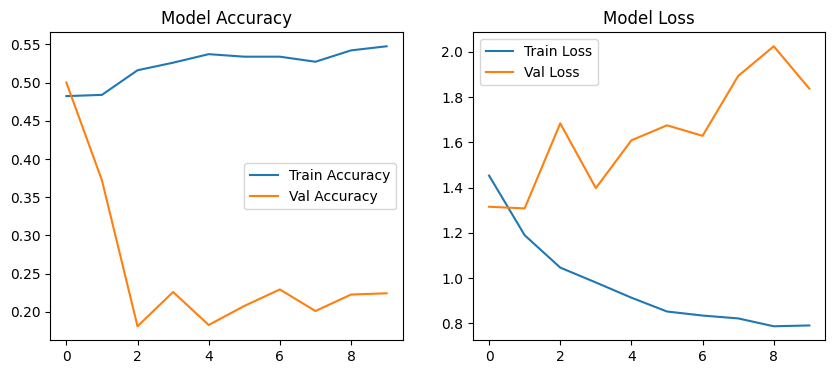

In [ ]:
# =============================================
# 🍇 STEP 8 (Fixed) — Fruit Freshness Detection (CNN)
# =============================================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Path to dataset
data_path = "/content/fruits_dataset/original_data_set"

# Train-validation split using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_set = train_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_set = train_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Check detected class folders
print("Detected Classes:", train_set.class_indices)

# =============================================
# 🧱 CNN Model Architecture (Updated for 7 Classes)
# =============================================

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(7, activation='softmax')  # ✅ updated to match 7 folders
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# =============================================
# 🚀 Train the Model
# =============================================
history = model.fit(
    train_set,
    validation_data=validation_set,
    epochs=10,   # you can change to 5 for faster training
    verbose=1
)

# =============================================
# 📊 Plot Accuracy and Loss Graphs
# =============================================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Model Loss")
plt.show()

# =============================================
# 💾